### Note: most models apply to matrix only; remember to reshape(-1,1) if the design matrix is a single array

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [4]:
from sklearn.model_selection import train_test_split

# KNearest-Neighbors Classifier
KNN memorizes the whole training set; for a new instance, it picks the k nearest training sample, and predicts the label of the new instance by a majority voting in the k nearest neighbors.
Use the Breast Cancer Wisconsin (Diagnostic) Database as an example


In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
'''
Read in the data as a dataframe
'''
cancerdf = pd.DataFrame(data = cancer['data'], index = np.arange(569))
cancerdf.columns = cancer['feature_names']
cancerdf['target'] = cancer['target']

cancerdf.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension   ...    worst texture  worst perimeter  worst area  \
0                 0.07871   ...            17.33           184.60      2019.0   
1                 0.05667   ...            23.41           158.80      1956.0   
2                 0.05999   ...            25.53           152.50      1709.0   
3                 0.09744   ...            26.50            98.87       567.7   
4                 0.05883   ...            16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [7]:
#feature and target
X_cancer = cancerdf[cancer['feature_names']]
y_cancer = cancerdf['target']
X_cancer.shape

(569, 30)

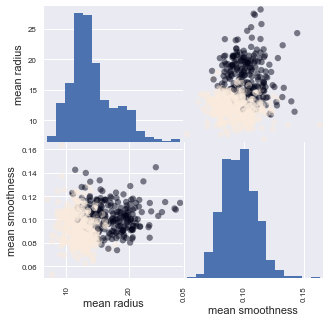

In [8]:
#Plot a scatter matrix to exam the data for radius and smoothness
scatter = pd.plotting.scatter_matrix(X_cancer[['mean radius','mean smoothness']], c= y_cancer, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(5,5))

In [9]:
#train, test split
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=143, random_state=0)

In [10]:
#build the knn model, choose k = 1 to begin with
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [11]:
# predict the test set
knn.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0])

In [12]:
# accuracy
knn.score(X_test,y_test)

0.91608391608391604

# KNN Regressor
When applying to regression, the KNN model uses the average of the nearest neighbors to predict the new instance's value

In [13]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


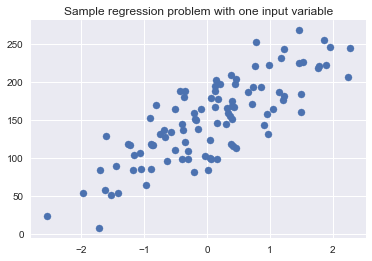

In [14]:
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)

In [15]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test, y_test)))
# for regression, knnreg.score(X_test,y_test) return the R^2

[ 231.70974697  148.35572605  150.58852659  150.58852659   72.14859259
  166.50590948  141.90634426  235.57098756  208.25897836  102.10462746
  191.31852674  134.50044902  228.32181403  148.35572605  159.16911306
  113.46875166  144.03646012  199.23189853  143.19242433  166.50590948
  231.70974697  208.25897836  128.01545355  123.14247619  141.90634426]
R-squared test score: 0.425


# Linear Regression


## Basic Linear regression

In [16]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
lin_reg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (weight w): {}'.format(lin_reg.coef_))
print('linear model intercept (b): {:.3f}'.format(lin_reg.intercept_))
print('R-squared score (test): {:.3f}'.format(lin_reg.score(X_test, y_test)))

linear model coeff (weight w): [ 45.70870465]
linear model intercept (b): 148.446
R-squared score (test): 0.492


/Users/lzq857/anaconda/envs/python3/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


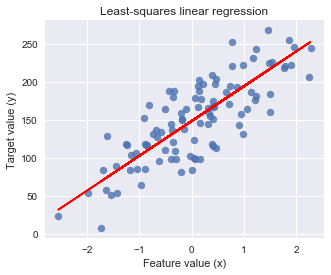

In [17]:
# plot the fitting line on the scatter plots
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, lin_reg.coef_ * X_R1 + lin_reg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')

## Simple Linear with Ridge/Lasso Penalty
#### Ridge does L2 regularization; Lasso does L1 regularization; the regularization strength is controlled by alpha (default 1)
#### - Lasso sparses out the most important features with non-zero weights (forcing other features' coeffiecients to zero); 
#### - Ridge keeps all features.
#### - One note is that for highly correlated features, Lasso may just sparse out one among many.

### Ridge Regression 

In [18]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

lin_ridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(lin_ridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(lin_ridge.coef_))
print('R-squared score (test): {:.3f}'
     .format(lin_ridge.score(X_test, y_test)))


ridge regression linear model intercept: 148.48609932907925
ridge regression linear model coeff:
[ 36.26506226]
R-squared score (test): 0.545


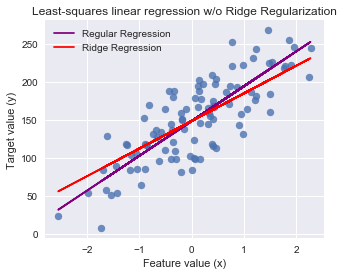

In [19]:
# plot the fitting line on the scatter plots

plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, lin_reg.coef_ * X_R1 + lin_reg.intercept_, 'purple',label="Regular Regression")
plt.plot(X_R1, lin_ridge.coef_ * X_R1 + lin_ridge.intercept_, 'r-',label="Ridge Regression")

plt.title('Least-squares linear regression w/o Ridge Regularization')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.legend(loc='upper left')


### Ridge Regression with feature normalization
Coeffiecient regularization is sentitive to feature scale

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_ridge2 = Ridge(alpha=2.0,random_state=0).fit(X_train_scaled, y_train)

### Optimal alpha for regularization

Ridge regression: effect of alpha regularization parameter



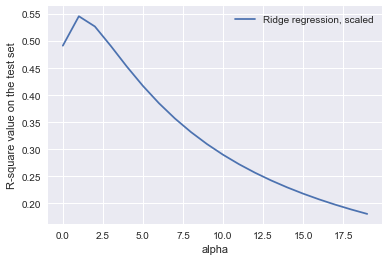

In [21]:
print('Ridge regression: effect of alpha regularization parameter\n')
list_alpha = range(0,20)
list_r2 = []
for alpha in list_alpha:
    lin_ridge2 = Ridge(alpha = alpha).fit(X_train_scaled, y_train)
    r2_test = lin_ridge2.score(X_test_scaled, y_test)
    list_r2.append(r2_test)
plt.plot(list_alpha,list_r2,label = 'Ridge regression, scaled')
plt.xlabel('alpha')
plt.ylabel('R-square value on the test set')
plt.legend(loc='upper right')


### Lasso Regression

In [22]:
from sklearn.linear_model import Lasso

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_lasso = Lasso(alpha=2.0,random_state=0).fit(X_train_scaled, y_train)

In [23]:
df_R2 = pd.DataFrame()
df_R2['Model'] = ['Simple Linear','Ridge','Ridge+Normalization','Lasso+Normalization']
df_R2['$R^2$ score (test)']= [lin_reg.score(X_test, y_test),lin_ridge.score(X_test, y_test),lin_ridge2.score(X_test_scaled, y_test),lin_lasso.score(X_test_scaled, y_test)]
df_R2

Model  $R^2$ score (test)
0        Simple Linear            0.491596
1                Ridge            0.545123
2  Ridge+Normalization            0.180732
3  Lasso+Normalization            0.545091

## Polynomial Regression

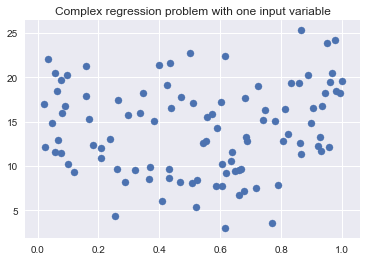

In [24]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)

In [25]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
poly_reg = Ridge(random_state=0).fit(X_train, y_train)

In [26]:
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(poly_reg.score(X_test, y_test)))

(poly deg 2 + ridge) R-squared score (test): 0.825


### make_pipeline()
#### a method that can leverage polynomial degree and model fitting at the same time

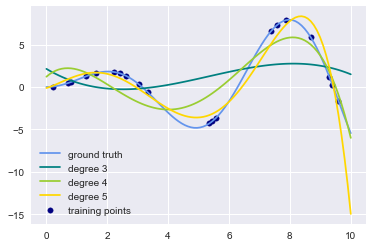

In [27]:
from sklearn.pipeline import make_pipeline

def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x.reshape(-1,1)
X_plot = x_plot.reshape(-1,1)

colors = ['teal', 'yellowgreen', 'gold']
plt.plot(x_plot, f(x_plot), color='cornflowerblue', label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(random_state=0))
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], label="degree %d" % degree)

plt.legend(loc='lower left')

# Logistic Regression
#### Logistic regression automatically has regularization whose strength is controlled by the inverse of parameter C (default 1.0)

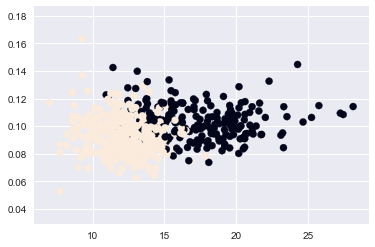

In [28]:
plt.scatter(X_cancer['mean radius'],X_cancer['mean smoothness'], c=y_cancer,marker= 'o', s=50)

In [29]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Accuracy of Logistic regression classifier on test set: 0.96


In [30]:

X_cancer.columns[0]
#'mean radius'
X_cancer.columns[4]
#'mean smoothness'
clf.coef_[0][0]
clf.coef_[0][4]

-0.12840906764560561

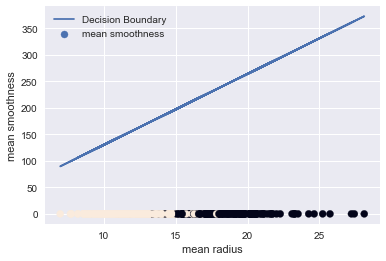

In [31]:
#plot decision boundary
plt.scatter(X_cancer['mean radius'],X_cancer['mean smoothness'], c=y_cancer,marker= 'o', s=50)
plt.plot(X_cancer['mean radius'],(0.5-clf.coef_[0][0]*X_cancer['mean radius'])/clf.coef_[0][4],label = 'Decision Boundary')
plt.xlabel('mean radius')
plt.ylabel('mean smoothness')
plt.legend(loc='upper left')

# SVM
#### SVM inserts a (n-1) dimensional manifold that maximizes the distance between two classes of points
#### SVM has multiple kernels (linear, RBF, etc.). The regularization term is controlled by parameter C

## Linear SVM
#### Linear SVM predict the classification by sign(w*x + b); the decision boundary is a (n-1) dimensional hyperplane
#### Linear SVM often results similar result to logistic regresion; though the latter has difficulty in classification around w*x + b = 0.5

In [32]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
clf = LinearSVC(random_state=0).fit(X_train, y_train)
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Linear SVC classifier on test set: 0.94


## SVM with RBF (Gaussian) kernel
#### RBF uses the Gaussian form function instead of dot product to calculate the "distance" between w*x and y
#### RBF kerneled SVM is controlled by two parameters: C, the regularization strength, and lambda, the inverse of variance in the Gaussian kernel

In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10,random_state=0).fit(X_train_scaled, y_train)

print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.96


# Cross-validation

#### the function cross_val_score evaluates the cv-fold average model score (default fold: cv = 3)
#### Note: when data scaling is needed, proper way to do cross-validation is not to scale the entire dataset with a single transform, which will leak information into the cv data about the whole dataset. Instead, scaling must be computed and applied for each cross-validation fold separately. This is achievable using pipelines. 

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

scaler = MinMaxScaler()
clf = make_pipeline(scaler, SVC(C=1))
cv_scores = cross_val_score(clf, X_cancer, y_cancer, cv = 5)
print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [ 0.93913043  0.93043478  0.95575221  0.95575221  0.97345133]
Mean cross-validation score (5-fold): 0.951


### Validation curve
#### Will plot train_score and test_score against parameter value range
#### In this example, the validation curve is plotted against multiple gamma values for an RBF kernel SVC in cross-validation, scaling is performed separately for each cv fold by using pipeline

In [70]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

scaler = MinMaxScaler()
clf = make_pipeline(scaler, SVC(C=1))
param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(clf, X_cancer, y_cancer,'svc__gamma',param_range, cv = 5)

In [71]:
train_scores,test_scores

(array([[ 0.6277533 ,  0.6277533 ,  0.62719298,  0.62719298,  0.62719298],
        [ 0.969163  ,  0.96035242,  0.95833333,  0.96491228,  0.96929825],
        [ 0.99559471,  0.99118943,  0.98903509,  0.99342105,  0.99122807],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]]),
 array([[ 0.62608696,  0.62608696,  0.62831858,  0.62831858,  0.62831858],
        [ 0.95652174,  0.95652174,  0.94690265,  0.95575221,  0.96460177],
        [ 0.91304348,  0.93913043,  0.94690265,  0.98230088,  0.91150442],
        [ 0.62608696,  0.62608696,  0.62831858,  0.62831858,  0.62831858]]))

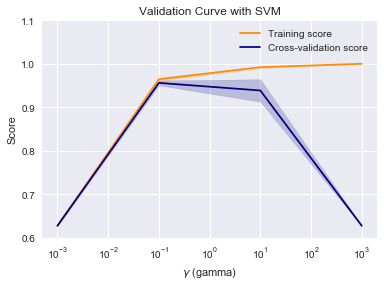

In [75]:
# This code based on scikit-learn validation_plot: 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.6, 1.1)

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange')

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange')

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy')

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy')

plt.legend(loc='best')


### Grid search
#### search the optimal parameter values on a grid
#### also making use of the pipeline for the purpose of scaling on cv-fold

In [82]:
from sklearn.model_selection import GridSearchCV
parameters = {'svc__gamma':np.logspace(-3, 3, 4), 'svc__C':range(1,10)}
clf = make_pipeline(scaler, SVC())

grid_search = GridSearchCV(clf, param_grid=parameters)
grid_search.fit(X_cancer,y_cancer)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svc__gamma': array([  1.00000e-03,   1.00000e-01,   1.00000e+01,   1.00000e+03]), 'svc__C': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [83]:
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.972
Best parameters set:
	svc__C: 6
	svc__gamma: 0.10000000000000001


# Decision Trees

In [92]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
clf = DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.97


### variable importance

In [102]:
dict_imp = {}
for i in range(len(iris.feature_names)):
    dict_imp[iris.feature_names[i]] = dict_imp.get(iris.feature_names[i],clf.feature_importances_[i])
list_imp = sorted(dict_imp.items(), key=lambda x: x[1],reverse = True)
list_imp


[('petal width (cm)', 0.58057604664464835),
 ('petal length (cm)', 0.3992752366367141),
 ('sepal width (cm)', 0.02014871671863756),
 ('sepal length (cm)', 0.0)]

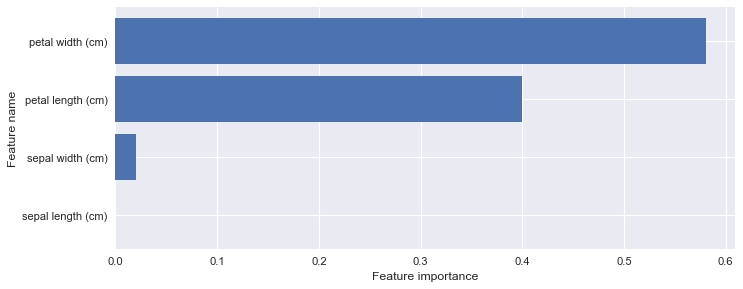

In [94]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)
    
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)

#### Set max decision tree depth to avoid overfitting

In [95]:
clf2 = DecisionTreeClassifier(random_state = 0, max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier (max_depth = 3) on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier (max_depth = 3) on test set: 0.97
